<a href="https://colab.research.google.com/github/ganonononon/Pandas_Udemy/blob/main/Pandas4_matplotlib%E3%81%AB%E3%82%88%E3%82%8B%E5%8F%AF%E8%A6%96%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams['font.size'] = 14

In [3]:
file_path = '/content/drive/MyDrive/UdemyPandas/dataset/house_price_jp.csv'

In [4]:
df = pd.read_csv(file_path)
df.head()

,index,type,land_type,prefecture,city,city2,station_name,building_year,station_dis,price,price_per_tsubo,room,area,land_shape,frontage,gross_floor_area,building_type,city_plan,BCR,FAR
0,1,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2016,1,37000000,NaN,３ＬＤＫ,75,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0
1,2,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2012,3,57000000,NaN,２ＬＤＫ,75,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0
2,3,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1981,3,17000000,NaN,２ＬＤＫ,50,NaN,NaN,NaN,ＲＣ,商業地域,80.0,400.0
3,4,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1977,0,3200000,NaN,１Ｒ,20,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0
4,5,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1989,2,17000000,NaN,２ＬＤＫ,50,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0


In [7]:
df['Log10_price'] =df['price'].apply(lambda x : np.log10(x))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19904 entries, 0 to 19903
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             19904 non-null  int64  
 1   type              19904 non-null  object 
 2   land_type         12261 non-null  object 
 3   prefecture        19904 non-null  object 
 4   city              19904 non-null  object 
 5   city2             19903 non-null  object 
 6   station_name      19769 non-null  object 
 7   building_year     19904 non-null  int64  
 8   station_dis       19766 non-null  object 
 9   price             19904 non-null  int64  
 10  price_per_tsubo   0 non-null      float64
 11  room              7209 non-null   object 
 12  area              19904 non-null  object 
 13  land_shape        12260 non-null  object 
 14  frontage          11282 non-null  float64
 15  gross_floor_area  12113 non-null  object 
 16  building_type     19242 non-null  object

In [10]:
df['station_dis'].unique()

array(['1', '3', '0', '2', '5', '4', '6', '11', '10', '30分?60分', '7',
       '12', '14', '18', '19', '25', '28', '26', '9', '29', '13', '20',
       '8', '16', '21', '24', '1H?1H30', '15', '22', '17', '1H30?2H',
       '23', nan, '2H?', '27', '8.0', '1.0', '14.0', '7.0', '6.0', '10.0',
       '9.0', '5.0', '3.0', '15.0'], dtype=object)

欠損のある列の文字列型の数値を数値型に変換する

In [11]:
df['station_dis'] = pd.to_numeric(df['station_dis'], errors='coerce')
df

,index,type,land_type,prefecture,city,city2,station_name,building_year,station_dis,price,...,room,area,land_shape,frontage,gross_floor_area,building_type,city_plan,BCR,FAR,Log10_price
0,1,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2016,1.0,37000000,...,３ＬＤＫ,75,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0,7.568202
1,2,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2012,3.0,57000000,...,２ＬＤＫ,75,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0,7.755875
2,3,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1981,3.0,17000000,...,２ＬＤＫ,50,NaN,NaN,NaN,ＲＣ,商業地域,80.0,400.0,7.230449
3,4,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1977,0.0,3200000,...,１Ｒ,20,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0,6.505150
4,5,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1989,2.0,17000000,...,２ＬＤＫ,50,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0,7.230449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19899,36388,宅地(土地と建物),住宅地,沖縄県,島尻郡南風原町,字宮平,NaN,1998,NaN,33000000,...,NaN,180,不整形,3.5,90,ＲＣ,市街化調整区域,60.0,200.0,7.518514
19900,36389,宅地(土地と建物),住宅地,沖縄県,島尻郡八重瀬町,字安里,NaN,2022,NaN,26000000,...,NaN,135,ほぼ台形,7.5,95,木造,都市計画区域外,NaN,NaN,7.414973
19901,36390,宅地(土地と建物),住宅地,沖縄県,島尻郡八重瀬町,字東風平,NaN,2021,NaN,43000000,...,NaN,165,ほぼ長方形,15.0,110,木造,第１種低層住居専用地域,50.0,100.0,7.633468
19902,36391,宅地(土地と建物),商業地,沖縄県,島尻郡八重瀬町,字友寄,NaN,1976,NaN,23000000,...,NaN,240,ほぼ台形,17.5,210,ＲＣ,市街化調整区域,60.0,200.0,7.361728


In [12]:
df['station_dis'].unique()

array([ 1.,  3.,  0.,  2.,  5.,  4.,  6., 11., 10., nan,  7., 12., 14.,
       18., 19., 25., 28., 26.,  9., 29., 13., 20.,  8., 16., 21., 24.,
       15., 22., 17., 23., 27.])

In [13]:
df['area'].unique()

array(['75', '50', '20', '35', '400', '500', '55', '65', '70', '250',
       '30', '45', '60', '80', '280', '175', '460', '100', '95', '230',
       '90', '85', '180', '155', '195', '15', '200', '105', '320', '270',
       '370', '110', '240', '220', '210', '380', '410', '420', '40',
       '300', '25', '390', '170', '190', '2000㎡以上', '160', '150', '130',
       '115', '125', '185', '260', '350', '310', '360', '120', '140',
       '135', '165', '490', '670', '520', '290', '145', '1100', '330',
       '620', '550', '680', '430', '810', '470', '910', '1300', '980',
       '710', '590', '340', '1200', '510', '650', '1000', '560', '1700',
       '1400', '1600', '750', '660', '1500', '580', '640', '450', '760',
       '530', '720', '830', '440', '1800', '480', '930', '950', '600',
       '730', '800', '740', '610', '630', '940', '990', '880', '890',
       '920', '780', '790', '970', '870', '770', '960', '700', '690',
       '850', '860', '540', '1900', '570', '820', '840', '10', '900'],
  

In [14]:
df['area'] = pd.to_numeric(df['area'], errors ='coerce')

In [15]:
df['area'].unique()

array([  75.,   50.,   20.,   35.,  400.,  500.,   55.,   65.,   70.,
        250.,   30.,   45.,   60.,   80.,  280.,  175.,  460.,  100.,
         95.,  230.,   90.,   85.,  180.,  155.,  195.,   15.,  200.,
        105.,  320.,  270.,  370.,  110.,  240.,  220.,  210.,  380.,
        410.,  420.,   40.,  300.,   25.,  390.,  170.,  190.,   nan,
        160.,  150.,  130.,  115.,  125.,  185.,  260.,  350.,  310.,
        360.,  120.,  140.,  135.,  165.,  490.,  670.,  520.,  290.,
        145., 1100.,  330.,  620.,  550.,  680.,  430.,  810.,  470.,
        910., 1300.,  980.,  710.,  590.,  340., 1200.,  510.,  650.,
       1000.,  560., 1700., 1400., 1600.,  750.,  660., 1500.,  580.,
        640.,  450.,  760.,  530.,  720.,  830.,  440., 1800.,  480.,
        930.,  950.,  600.,  730.,  800.,  740.,  610.,  630.,  940.,
        990.,  880.,  890.,  920.,  780.,  790.,  970.,  870.,  770.,
        960.,  700.,  690.,  850.,  860.,  540., 1900.,  570.,  820.,
        840.,   10.,

NaNをドロップ

In [16]:
df = df.dropna(subset=['station_dis','area'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15663 entries, 0 to 19895
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             15663 non-null  int64  
 1   type              15663 non-null  object 
 2   land_type         8439 non-null   object 
 3   prefecture        15663 non-null  object 
 4   city              15663 non-null  object 
 5   city2             15662 non-null  object 
 6   station_name      15663 non-null  object 
 7   building_year     15663 non-null  int64  
 8   station_dis       15663 non-null  float64
 9   price             15663 non-null  int64  
 10  price_per_tsubo   0 non-null      float64
 11  room              6812 non-null   object 
 12  area              15663 non-null  float64
 13  land_shape        8438 non-null   object 
 14  frontage          7820 non-null   float64
 15  gross_floor_area  8336 non-null   object 
 16  building_type     15209 non-null  object 
 17

scatter

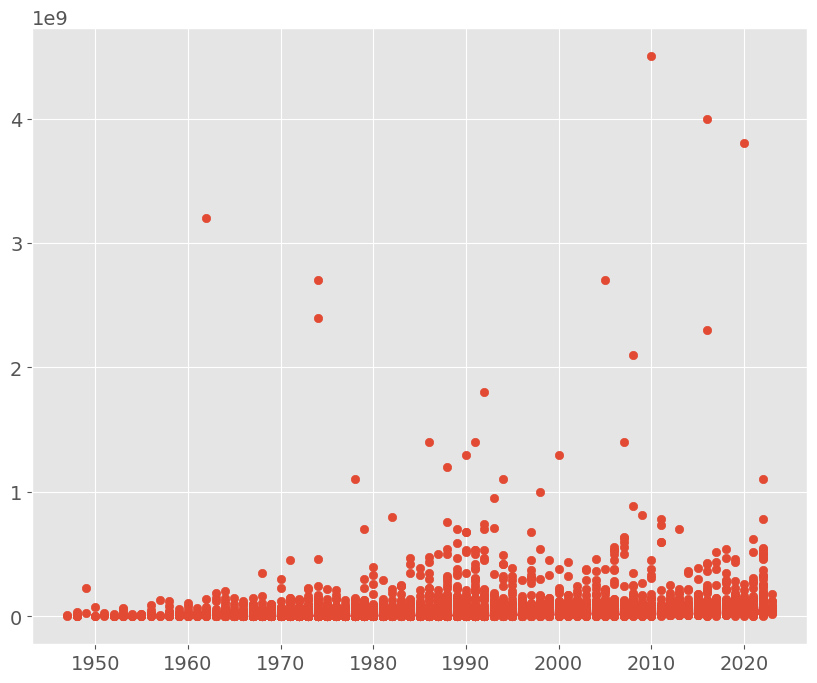

In [18]:
plt.scatter(df['building_year'], df['price'])

Text(0, 0.5, 'Log10_price')

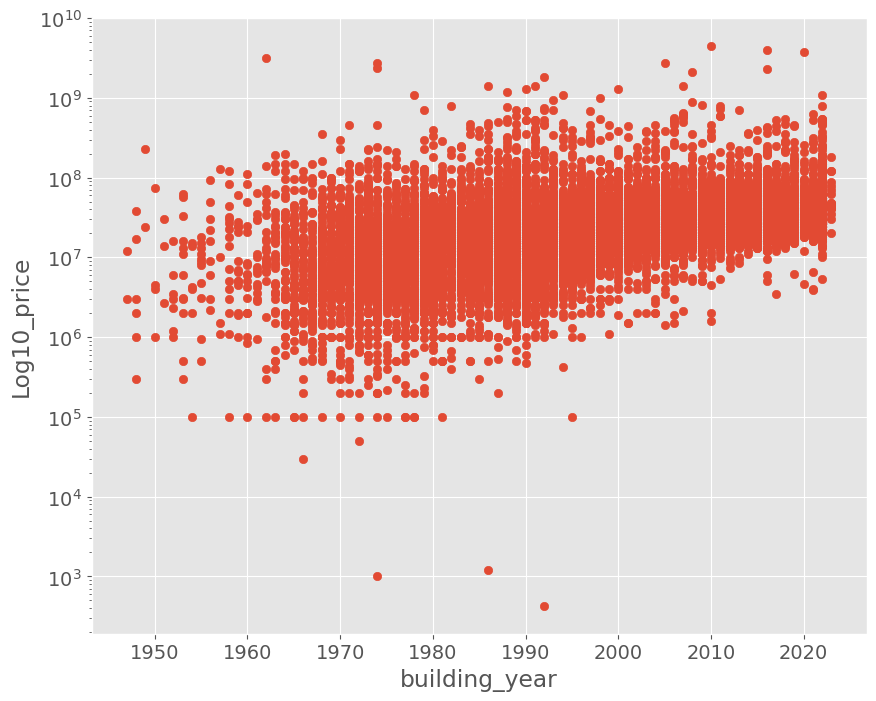

In [20]:
plt.scatter(df['building_year'], df['price'])
plt.yscale('log')
plt.xlabel('building_year')
plt.ylabel('Log10_price')

In [22]:
df['room'].unique()

array(['３ＬＤＫ', '２ＬＤＫ', '１Ｒ', '１ＤＫ', nan, '１ＬＤＫ', '２ＤＫ', '４ＬＤＫ', '１Ｋ',
       '３ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', '５ＬＤＫ', '１ＬＤＫ＋Ｓ', '３ＤＫ', '４ＤＫ', 'オープンフロア',
       '２Ｋ', '２ＤＫ＋Ｓ', '１ＤＫ＋Ｓ', '３Ｋ', '４ＬＤＫ＋Ｓ', '４Ｋ', '５ＤＫ'], dtype=object)

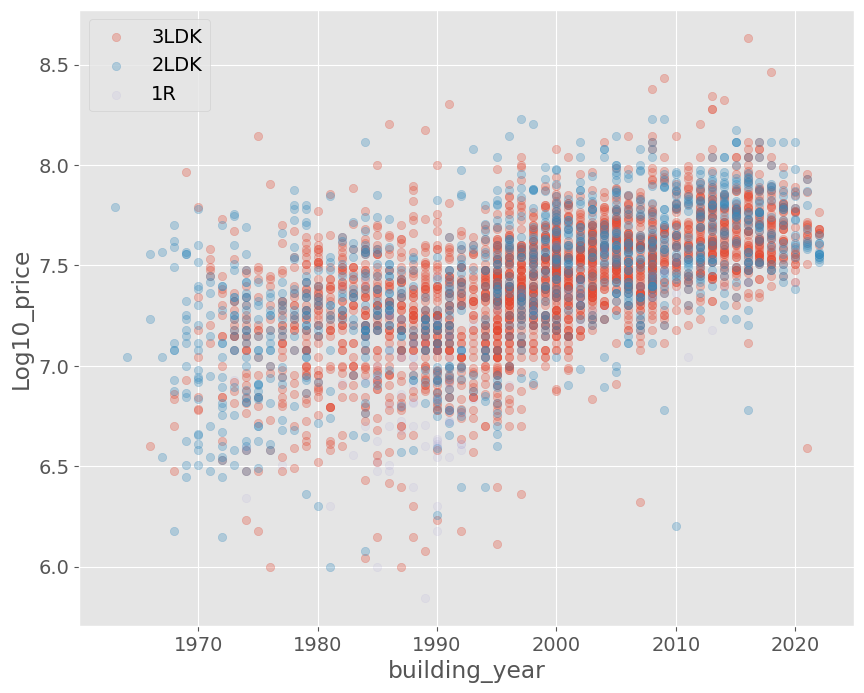

In [26]:
target_df = df.query('room == "３ＬＤＫ"')
plt.scatter(target_df['building_year'], target_df['Log10_price'], label='3LDK', alpha=0.3)

target_df = df.query('room == "２ＬＤＫ"')
plt.scatter(target_df['building_year'], target_df['Log10_price'], label='2LDK', alpha=0.3)

target_df = df.query('room == "１Ｒ"')
plt.scatter(target_df['building_year'], target_df['Log10_price'], label='1R', alpha=0.1)

plt.xlabel('building_year')
plt.ylabel('Log10_price')
plt.legend() #ラベルの表示

In [27]:
df['room'] .unique()

array(['３ＬＤＫ', '２ＬＤＫ', '１Ｒ', '１ＤＫ', nan, '１ＬＤＫ', '２ＤＫ', '４ＬＤＫ', '１Ｋ',
       '３ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', '５ＬＤＫ', '１ＬＤＫ＋Ｓ', '３ＤＫ', '４ＤＫ', 'オープンフロア',
       '２Ｋ', '２ＤＫ＋Ｓ', '１ＤＫ＋Ｓ', '３Ｋ', '４ＬＤＫ＋Ｓ', '４Ｋ', '５ＤＫ'], dtype=object)

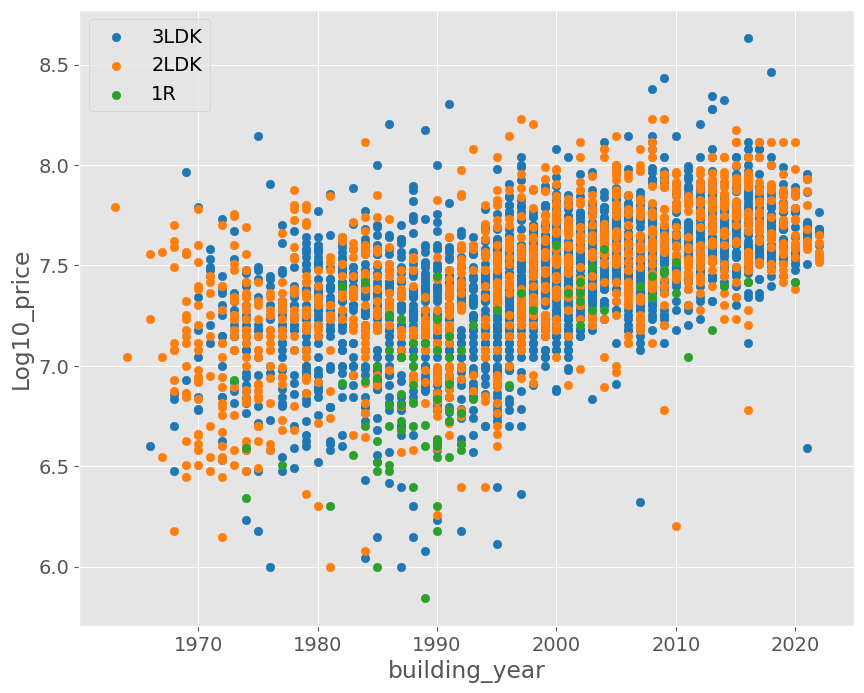

In [30]:
room_list = ['３ＬＤＫ', '２ＬＤＫ', '１Ｒ']
room_labels = ['3LDK','2LDK','1R']
cmap = plt.get_cmap('tab10')
for i, room in enumerate(room_list):
  target_df = df.query('room == @room')
  plt.scatter(target_df['building_year'], target_df['Log10_price'],
  label=room_labels[i], color=cmap(i))
  plt.xlabel('building_year')
plt.ylabel('Log10_price')
plt.legend()

Text(0, 0.5, 'Log10_price')

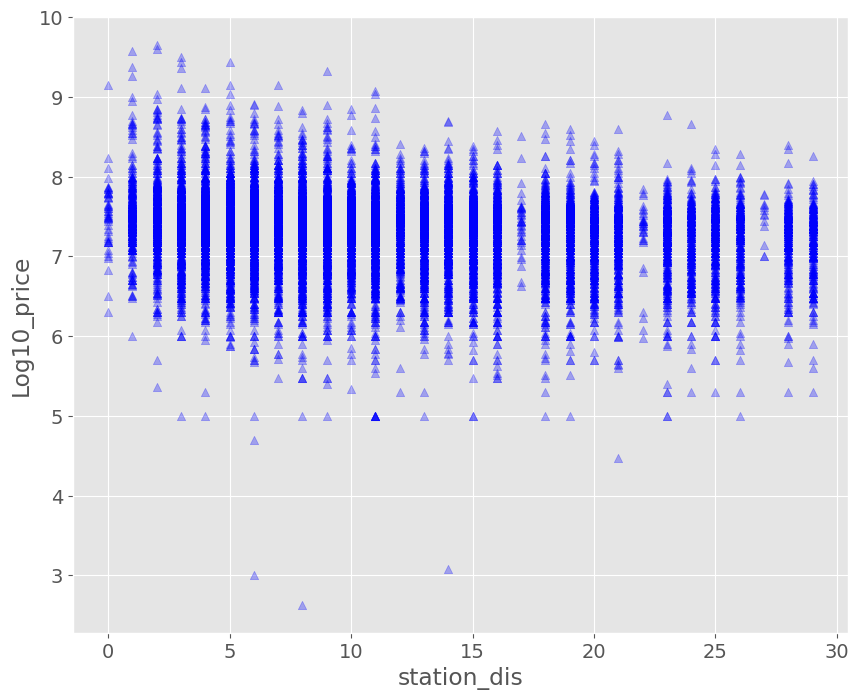

In [32]:
plt.scatter(df['station_dis'], df['Log10_price'], marker='^', alpha=0.3, color='blue')
plt.xlabel('station_dis')
plt.ylabel('Log10_price')

折れ線図

In [33]:
import plotly.express as px

In [36]:
stock_df = px.data.stocks()
stock_df

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [37]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    105 non-null    object 
 1   GOOG    105 non-null    float64
 2   AAPL    105 non-null    float64
 3   AMZN    105 non-null    float64
 4   FB      105 non-null    float64
 5   NFLX    105 non-null    float64
 6   MSFT    105 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.9+ KB


In [38]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [39]:
stock_df.dtypes

,0
date,datetime64[ns]
GOOG,float64
AAPL,float64
AMZN,float64
FB,float64
NFLX,float64
MSFT,float64


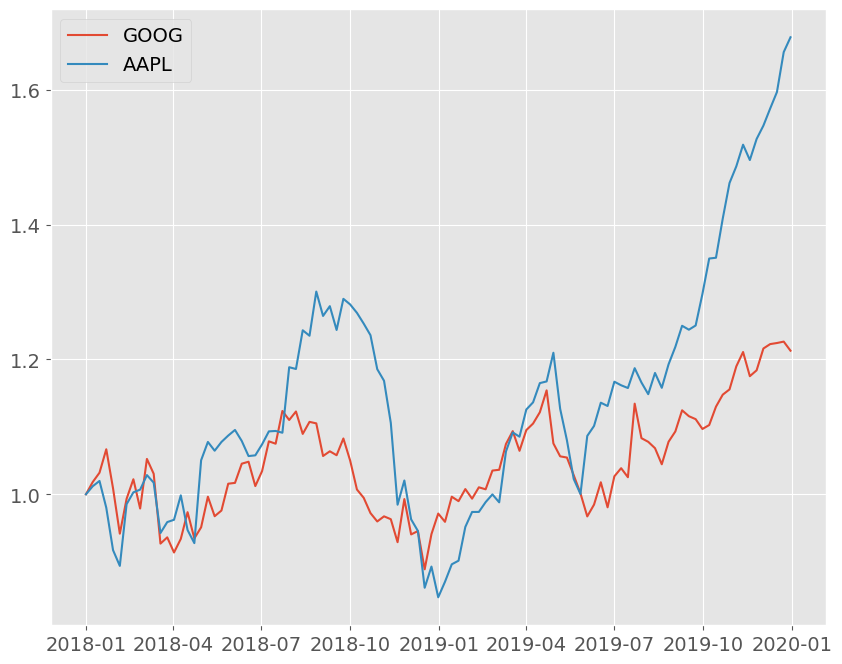

In [41]:
plt.plot(stock_df['date'], stock_df['GOOG'], label='GOOG')
plt.plot(stock_df['date'], stock_df['AAPL'], label='AAPL')
plt.legend()

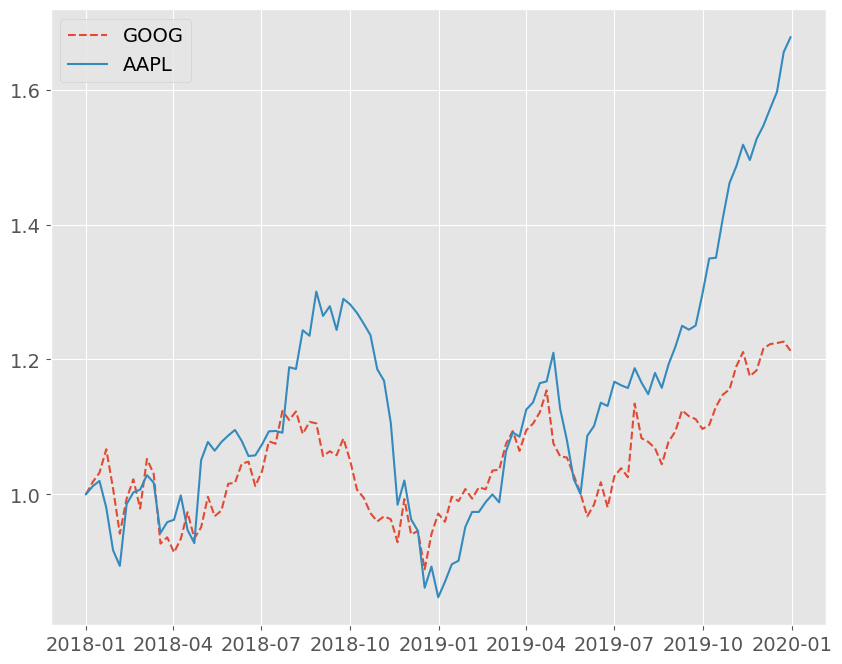

In [44]:
plt.plot(stock_df['date'], stock_df['GOOG'], label='GOOG', linestyle='--')
plt.plot(stock_df['date'], stock_df['AAPL'], label='AAPL')
plt.legend()

ヒストグラム

(array([1.5584e+04, 5.8000e+01, 8.0000e+00, 4.0000e+00, 1.0000e+00,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([4.30000000e+02, 4.50000387e+08, 9.00000344e+08, 1.35000030e+09,
        1.80000026e+09, 2.25000022e+09, 2.70000017e+09, 3.15000013e+09,
        3.60000009e+09, 4.05000004e+09, 4.50000000e+09]),
 <BarContainer object of 10 artists>)

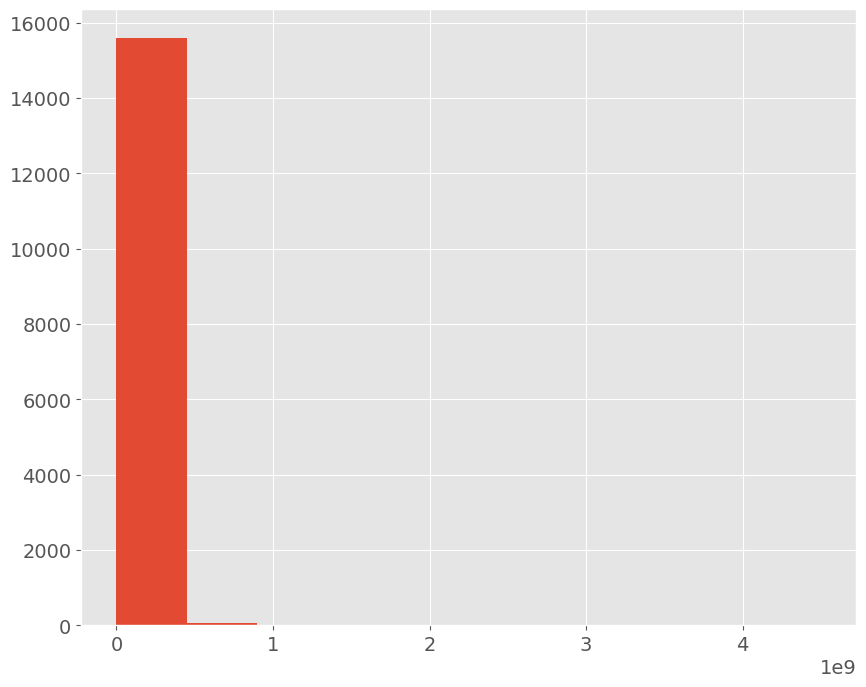

In [46]:
plt.hist(df['price'])

fig=. arrayを消す

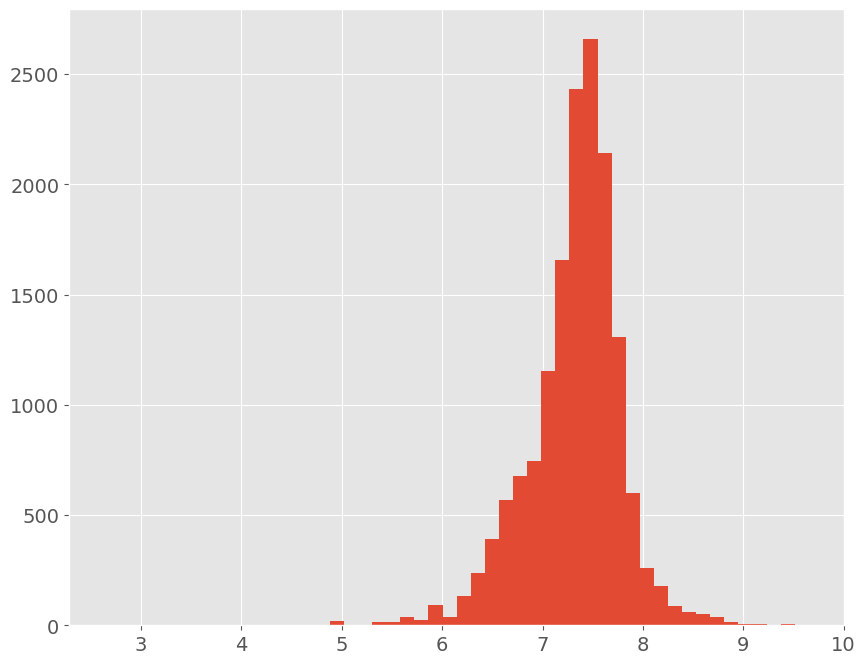

In [48]:
fig = plt.hist(df['Log10_price'], bins=50)

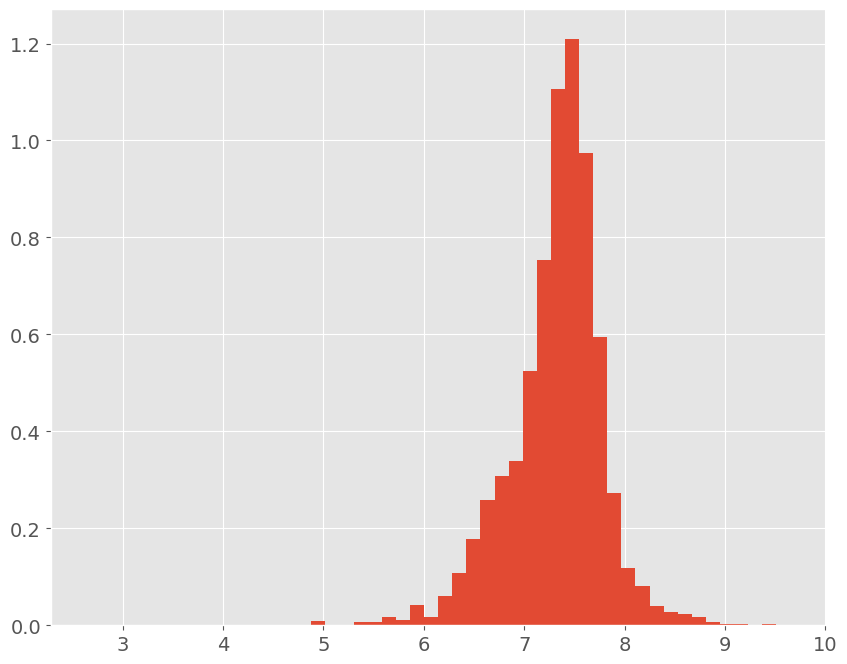

In [49]:
fig = plt.hist(df['Log10_price'], bins=50, density=True)

subplot


複数のグラフを書き並べる

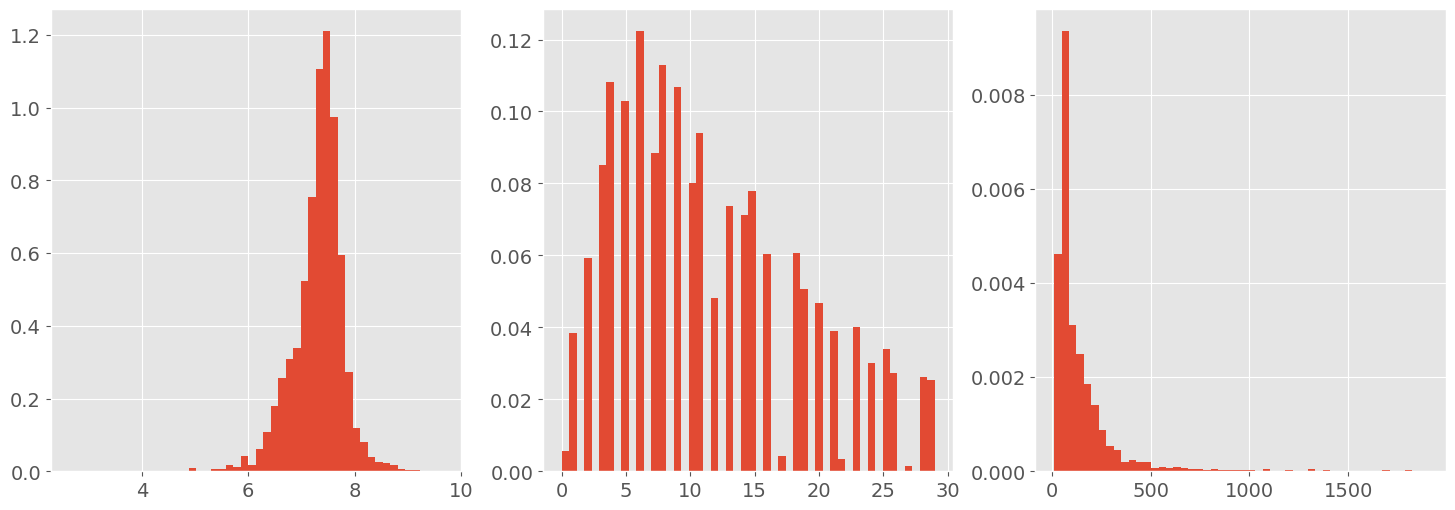

In [51]:
fig = plt.figure(figsize=(18,6))
fig = plt.subplot(1,3,1)
fig = plt.hist(df['Log10_price'], bins=50, density=True)

fig = plt.subplot(1,3,2)
fig = plt.hist(df['station_dis'], bins=50, density=True)

fig = plt.subplot(1,3,3)
fig = plt.hist(df['area'], bins=50, density=True)